No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


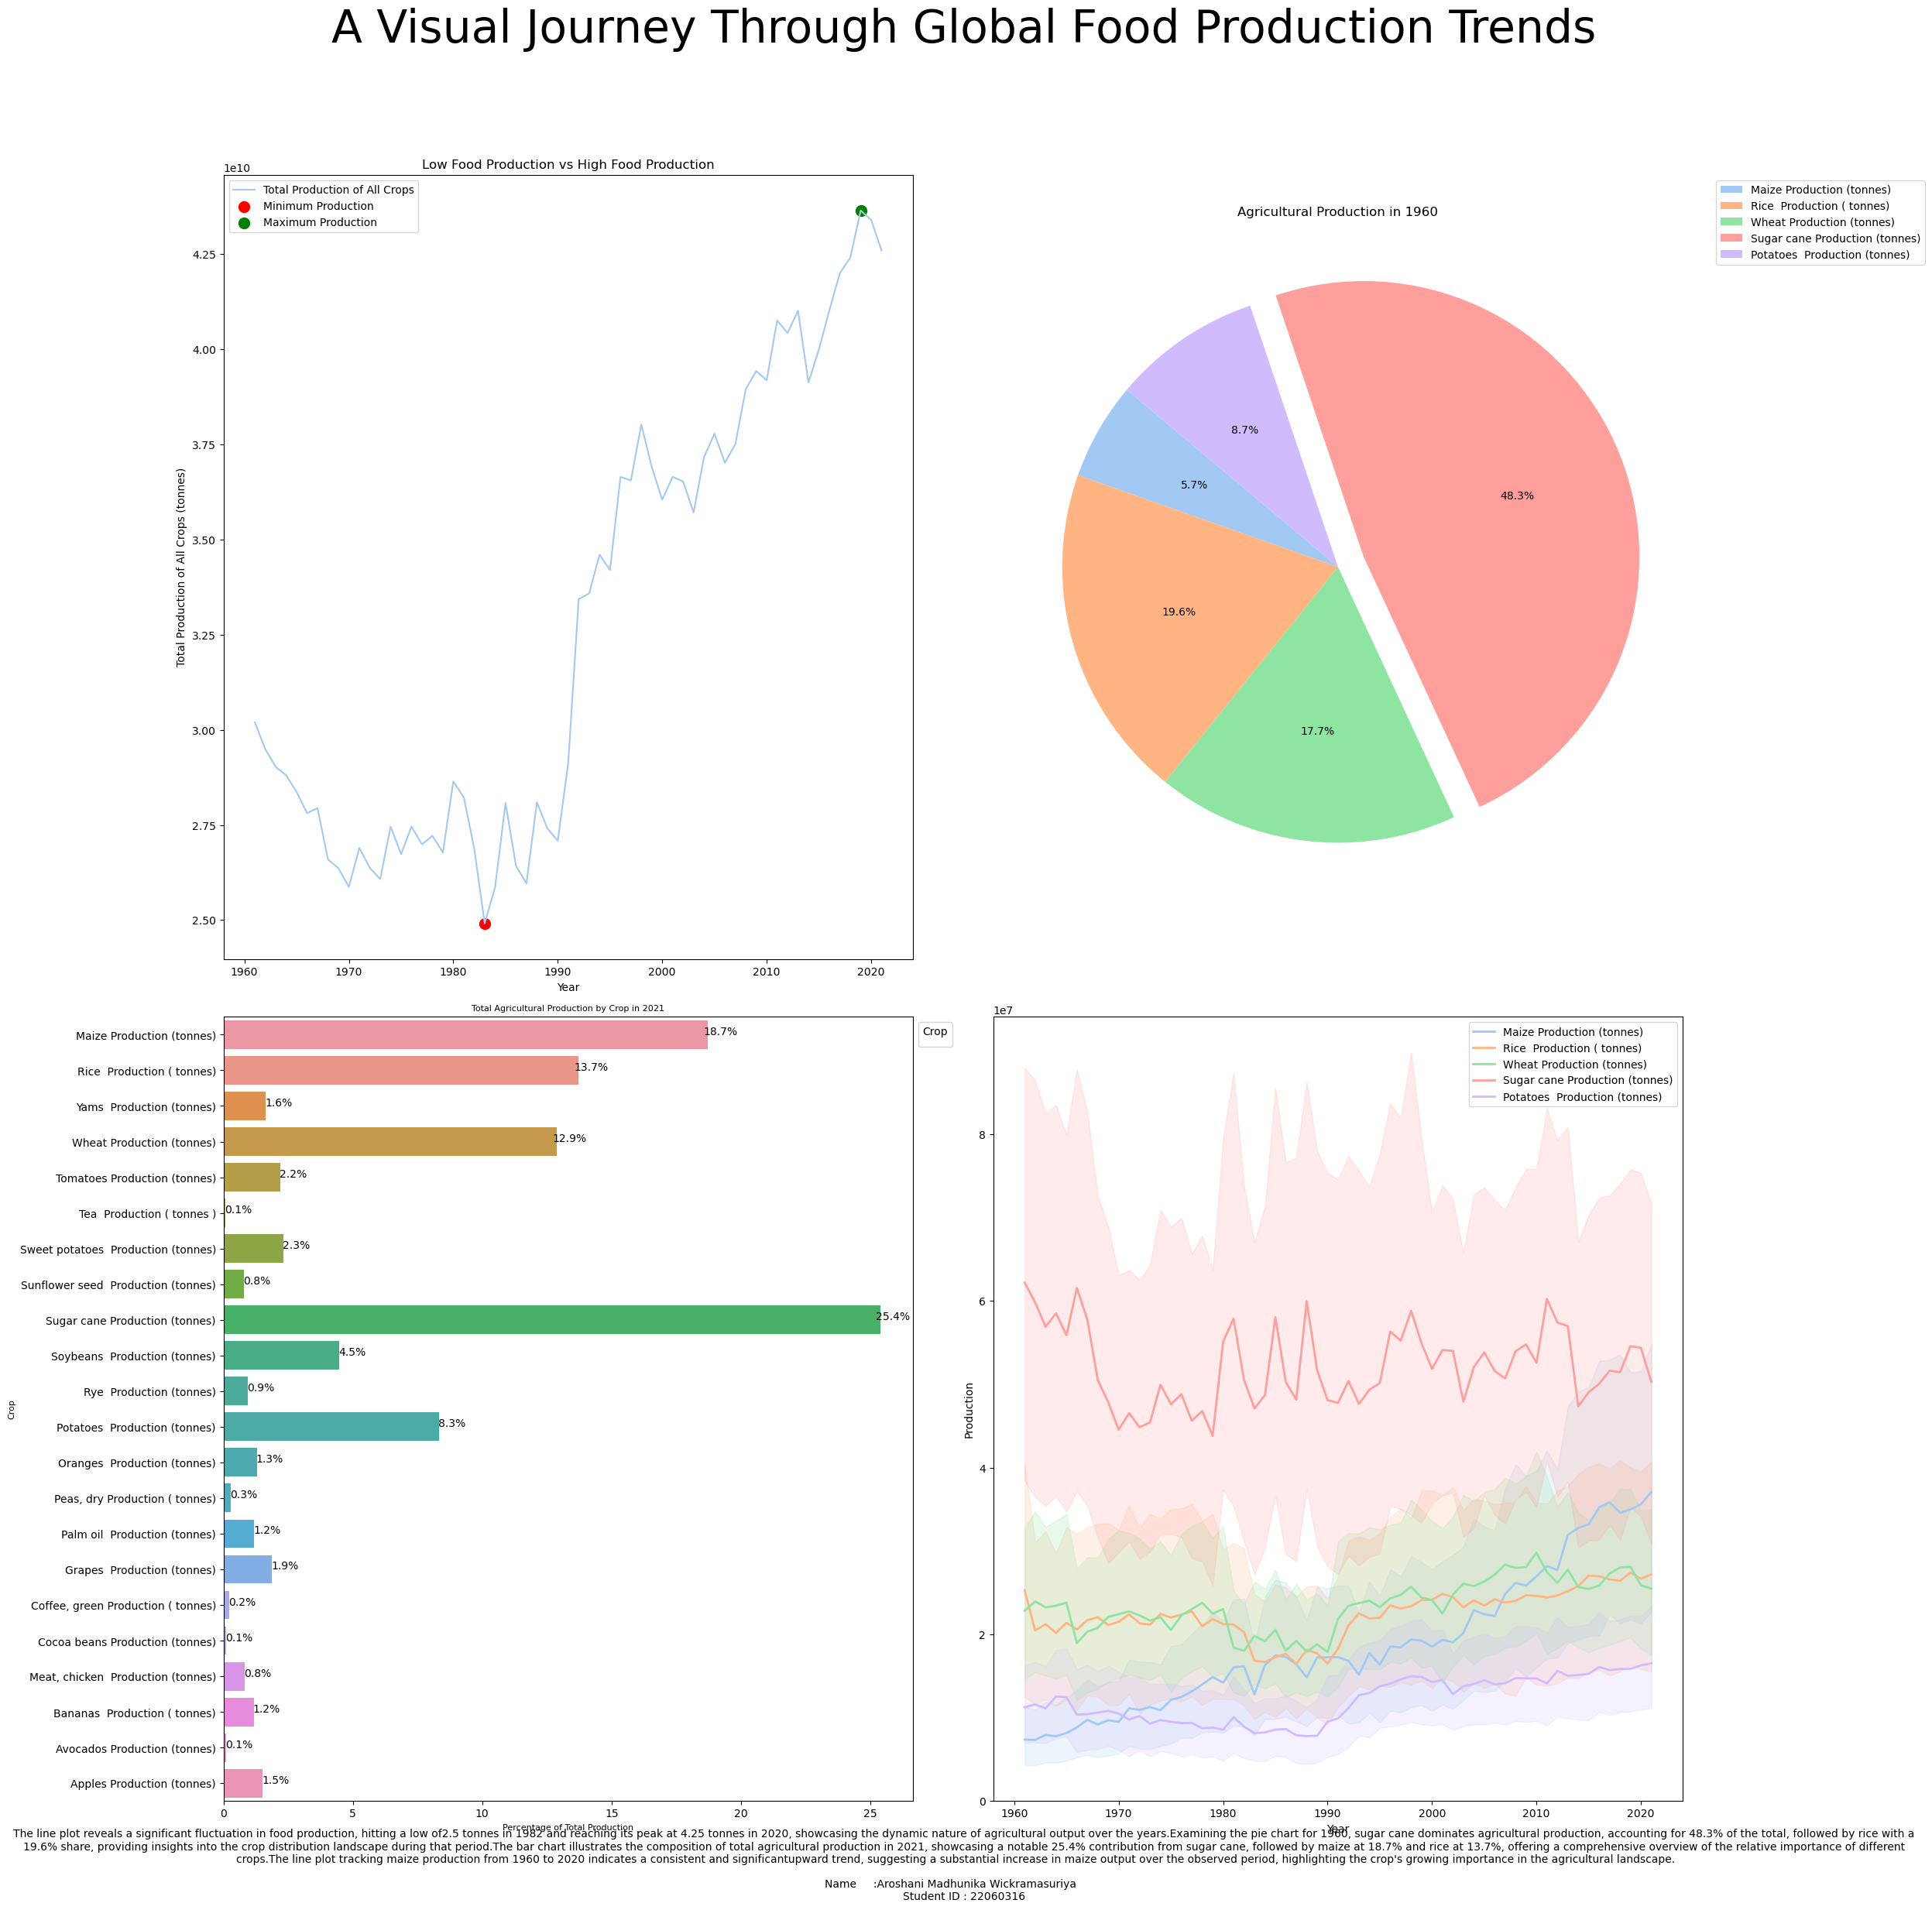

In [2]:
# -*- coding: utf-8 -*-
"""Aroshani Madhunika Wickramasuriya_dhv.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ChxvdT63kwZscAqa-mQXak93WoYGhdzo

# Data Source : https://www.kaggle.com/datasets/rafsunahmad/world-food-production
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("22060316.csv")

df = df.rename(columns = {"Entity" : "Country_name"})

"""# Statistics using Pandas"""

df.describe()

"""# Summary statistics using Numpy"""

# Select numeric columns for summary statistics
col = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate summary statistics using NumPy
summary_statistics = df[col].agg([np.mean, np.median, np.std, np.min, np.max])

summary_statistics

# Select columns related to crop production
crop_columns = [
    'Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
    'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )',
    'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)',
    'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
    'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)',
    'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)',
    'Coffee, green Production ( tonnes)', 'Cocoa beans Production (tonnes)',
    'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
    'Apples Production (tonnes)'
]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("22060316.csv")

df = df.rename(columns = {"Entity" : "Country_name"})

#Statistics using Pandas
df.describe()

#Statistics using Numpy
# Select numeric columns for summary statistics
col = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate summary statistics using NumPy
summary_statistics = df[col].agg([np.mean, np.median, np.std, np.min, np.max])


# Select columns related to crop production
crop_columns = [
    'Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
    'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )',
    'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)',
    'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
    'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)',
    'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)',
    'Coffee, green Production ( tonnes)', 'Cocoa beans Production (tonnes)',
    'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
    'Apples Production (tonnes)'
]

def fun1(df, crop_columns, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))

    df1 = df.groupby('Year')[crop_columns].sum().reset_index()
    df1['Total_Production_All_Crops'] = df1[crop_columns].sum(axis=1)

    min_total_production = df1.loc[df1['Total_Production_All_Crops'].idxmin()]
    max_total_production = df1.loc[df1['Total_Production_All_Crops'].idxmax()]

    ax.plot(df1['Year'], df1['Total_Production_All_Crops'], label='Total Production of All Crops')
    ax.scatter(min_total_production['Year'], min_total_production['Total_Production_All_Crops'],
               color='red', label='Minimum Production', s=100)
    ax.scatter(max_total_production['Year'], max_total_production['Total_Production_All_Crops'],
               color='green', label='Maximum Production', s=100)

    ax.set_title('Low Food Production vs High Food Production')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Production of All Crops (tonnes)')
    ax.legend()

def fun2(df, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    selected_crops = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)',
                      'Wheat Production (tonnes)', 'Sugar cane Production (tonnes)',
                      'Potatoes  Production (tonnes)']

    df_selected_crops = df[['Year'] + selected_crops]
    df_grouped = df_selected_crops.groupby('Year')[selected_crops].sum().reset_index()
    df_grouped_melted = pd.melt(df_grouped, id_vars='Year', value_vars=selected_crops,
                                var_name='Crop', value_name='Production')


    data_1960 = df_grouped_melted[df_grouped_melted['Year'] == 1961]
    explode_1960 = [0.1 if crop == 'Sugar cane Production (tonnes)' else 0 for crop in data_1960['Crop']]
    ax.pie(data_1960['Production'], autopct='%1.1f%%', startangle=140, explode=explode_1960)
    ax.set_title('Agricultural Production in 1960')

    ax.legend(data_1960['Crop'], loc='center', bbox_to_anchor=(1.2, 1))


def fun3(df , ax=None) :
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    '''
    he function 'fun3' returns a multi-line chart showing the yearly

    production trends for specific crops, with each crop represented by a colored line.
    '''

    selected_crops = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)',
                      'Wheat Production (tonnes)', 'Sugar cane Production (tonnes)',
                      'Potatoes  Production (tonnes)']

    df_selected_crops = df[df.columns.intersection(['Year'] + selected_crops)]
    df_selected_crops_melted = pd.melt(df_selected_crops, id_vars='Year', value_vars=selected_crops,
                                       var_name='Crop', value_name='Production')



    for crop in selected_crops:
        crop_data = df_selected_crops_melted[df_selected_crops_melted['Crop'] == crop]
        sns.lineplot(x='Year', y='Production', data=crop_data, label=crop, linewidth=2, linestyle='-')

    ax.set_title('Yearly Trends for Specific Crops', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Production (tonnes)', fontsize=14)
    ax.legend(title='Crop', loc='upper left', bbox_to_anchor=(1, 1))


def fun4(df, selected_year, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    crop_columns = [
        'Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
        'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )',
        'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)',
        'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
        'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)',
        'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)',
        'Coffee, green Production ( tonnes)', 'Cocoa beans Production (tonnes)',
        'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
        'Apples Production (tonnes)'
    ]

    df_selected_year = df[df['Year'] == selected_year]
    total_production = df_selected_year[crop_columns].sum()
    data_for_bar = pd.DataFrame({'Crop': total_production.index, 'Production': total_production.values})
    data_for_bar['Percentage'] = (data_for_bar['Production'] / data_for_bar['Production'].sum()) * 100

    sns.set_palette("pastel")
    ax = sns.barplot(x='Percentage', y='Crop', data=data_for_bar, errorbar=None, ax=ax)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.5
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='center')

    ax.set_title(f'Total Agricultural Production by Crop in {selected_year}', fontsize=8)
    ax.set_xlabel('Percentage of Total Production', fontsize=8)
    ax.set_ylabel('Crop', fontsize=8)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
fig.suptitle("A Visual Journey Through Global Food Production Trends", fontsize=42)

# Plot Total Production of All Crops Over the Years
fun1(df, crop_columns, ax=axes[0, 0])

# Plot Side-by-Side Pie Chart Comparison of Agricultural Production in 1960 and 2021
fun2(df, ax=axes[0, 1])

# Plot Yearly Trends for Specific Crops
fun3(df, ax=axes[1, 0])

# Plot Percentage Contribution of Each Crop to Total Agricultural Production in a Specific Year
fun4(df, selected_year=2021, ax=axes[1, 0])

# Add a common description
description = ("The line plot reveals a significant fluctuation in food production, hitting a low of"
 "2.5 tonnes in 1982 and reaching its peak at 4.25 tonnes in 2020, showcasing the dynamic nature of agricultural output over the years."

"Examining the pie chart for 1960, sugar cane dominates agricultural production, accounting for "
"48.3% of the total, followed by rice with a 19.6% share, providing insights into the crop distribution landscape during that period."

"The bar chart illustrates the composition of total agricultural production in 2021, showcasing "
"a notable 25.4% contribution from sugar cane, followed by maize at 18.7% and rice at 13.7%, offering a comprehensive overview of the relative importance of different crops."

"The line plot tracking maize production from 1960 to 2020 indicates a consistent and significant"
"upward trend, suggesting a substantial increase in maize output over the observed period, highlighting the crop's growing importance in the agricultural landscape.")


# Add student information
student_info = (
    "     \n\nName     :Aroshani Madhunika Wickramasuriya   "
    "     \nStudent ID : 22060316"
)

fig.text(0.5, 0.02, description + student_info, ha='center', va='center', fontsize=10, wrap=True)



# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("22060316.png", dpi=300)

